### Gradient Descent

在** 梯度下降 **之中，我们在每个epoch中更新一下每一层的参数


$$
\frac{\partial}{\partial w_j} J(w) = \sum_{i} ( y^{(i)} - a^{(i)} )  x^{(i)}_j
$$

** 注意 **：这个上标$(i)$指的是第i个例子，这个下标$j$指的是第j个维度/特征


### 前向传播

### 后向传播

每个神经元的权重通过梯度下降来学习，其中每个神经元的误差是根据它的权重得出的

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [8]:
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [9]:
# read the dataset
train = pd.read_csv("../data/intro_to_ann.csv")

In [11]:
train.head()

,Feature1,Feature2,Target
0,2.067788,0.258133,1
1,0.993994,-0.609145,1
2,-0.690315,0.749921,0
3,1.023582,0.529003,0
4,0.700747,-0.496724,1


In [14]:
X, y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])

In [15]:
X.shape

(500, 2)

In [16]:
y.shape

(500,)

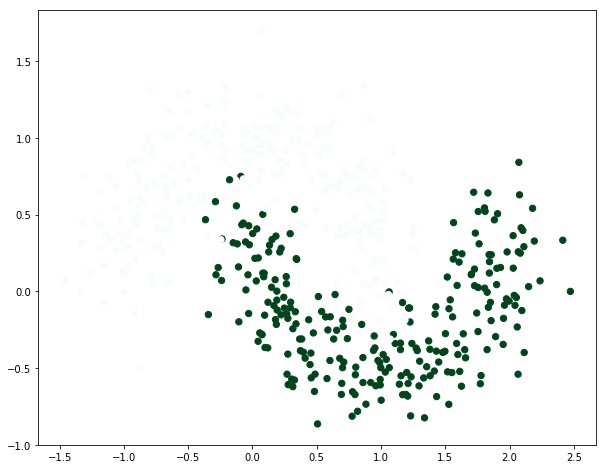

In [65]:
# Visualize datasets
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

In [22]:
# The function: Initial weights for the neural network 
import random
random.seed(123)

# calculate a random number where:  a <= rand < b
def rand(a, b):
    return (b-a)*random.random() + a


In [27]:
# Make a matrix 
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

In [28]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [29]:
# Prepare for backward propagation

In [54]:
# derivative of our sigmoid function
def dsigmoid(y):
    return y -y**2

When we set up the neural network structure, we must be familiar with the number of inputs,

the number of neurons in the hidden layer, and the number of output neurons.

In [66]:
# ```python
# class MLP:
#     def __init__(self, ni, nh, no):
#         # number of input, hidden, and output nodes
#         self.ni = ni + 1
#         self.nh = nh
#         self.no = no
        
#         # activation for nodes
#         self.ai = [1.0]*self.ni
#         self.ah = [1.0]*self.nh
#         self.ao = [1.0]*self.no
        
#         # create weights
#         self.wi = makeMatrix(self.ni, self.nh)
#         self.wo = makeMatrix(self.nh, self.no)
        
#         # set the oral values
#         self.wi = rand(-0.2, 0.2, size = self.wi.shape)
#         self.wo = rand(-0.2, 0.2, size = self.wo.shape)
        
#         # last change in weight for monment
#         self.ci = rand(-0.2, 0.2, size = self.wi.shape)
#         self.co = rand(-0.2, 0.2, size = self.wo.shape)
# ```

### Activation Function

In [35]:
# def activate(self, inputs):
    
#     if len(inputs) != self.ni-1:
#         print(inputs)
#         raise ValueError("wrong number of inputs")
        
#     # input activation
#     for i in range(self.ni-1):
#         self.ai[i] = input[i]
        
#     # hidden activation
#     for j in range(self.nh):
#         sum_h = 0.0
#         for i in range(self.ni):
#             # Calculate with the parameters with every layer
#             sum_h += self.ai[i] * self.wi[i][j]
#         self.ah[j] = sigmoid(sum_h)
        
#     # output activation
#     for k in range(self.no):
#         sum_o = 0.0
#         for j in range(self.nh):
#             sum_o +=self.ah[j]*self.wo[j][k]
#         self.ao[k] = sigmoid(sum_o)
        
#     return self.ao[:]

### BackPropagation

In [38]:
# def backPropagate(self, target, N, M):
    
#     if len(target) != self.no:
#         print(target)
#         raise ValueError("wrong number of target values")
    
#     # calculate error term for output 
#     output_deltas = np.zeros(self.no)
#     for k in range(self.no):
#         error  = targets[k] - self.ao[k]
#         output_detas[k] = dsigmoid(self.ao[k]) * error
        
#     # calculate error term for hidden 
#     hidden_dtltas = np.zeros(self.nh)
#     for j in range(self.nh):
#         error = 0.0
#         for k in range(self.no):
#             error += output_deltas[k] * self.wo[j][k]
#         hidden_dtltas[j] = dsigmoid(self.ah[j]) * error
    
#     # update output weights
#     for j in range(self.nh):
#         for k in range(self.no):
#             change = output_deltas[k] * slef.ah[j]
#             self.wo[j][k] +=N*change + M*self.co[j][k]
#             selk.co[j][k] = change
            
#     # update input weight
#     for i in range(self.ni):
#         for j in range(self.nh):
#             change = hidden_dtltas[j]*self.ai[i]
#             self.wi[i][j] = N*change + M*self.ci[i][j]
#             self.ci[i][j] = change
#     # calculate error
#     error = 0.0
#     for k in range(len(target)):
#         error +=0.5*(targets[k]-self.ao[k])**2
#         # Using the squared difference as a loss function
#     return error

In [40]:
#  def train(self, patterns, iterations=1000, N=0.5, M=0.1):
#         # N: learning rate
#         # M: momentum factor
#         patterns = list(patterns)
#         for i in range(iterations):
#             error = 0.0
#             for p in patterns:
#                 inputs = p[0]
#                 targets = p[1]
#                 self.activate(inputs)
#                 error += self.backPropagate([targets], N, M)
#             if i % 5 == 0:
#                 print('error in interation %d : %-.5f' % (i,error))
#             print('Final training error: %-.5f' % error)

In [41]:
# def test(self, patterns):
#         self.predict = np.empty([len(patterns), self.no])
#         for i, p in enumerate(patterns):
#             self.predict[i] = self.activate(p)
#             self.predict[i] = self.activate(p[0])

In [59]:
class MLP:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)
        

    def backPropagate(self, targets, N, M):
        
        if len(targets) != self.no:
            print(targets)
            raise ValueError('wrong number of target values')

        # calculate error terms for output
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k]-self.ao[k]
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # calculate error terms for hidden
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error += output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # update output weights
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] += N*change + M*self.co[j][k]
                self.co[j][k] = change

        # update input weights
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i]
                self.wi[i][j] += N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error += 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            #self.predict[i] = self.activate(p[0])
            
    def activate(self, inputs):
        
        if len(inputs) != self.ni-1:
            print(inputs)
            raise ValueError('wrong number of inputs')

        # input activations
        for i in range(self.ni-1):
            self.ai[i] = inputs[i]

        # hidden activations
        for j in range(self.nh):
            sum_h = 0.0
            for i in range(self.ni):
                sum_h += self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum_h)

        # output activations
        for k in range(self.no):
            sum_o = 0.0
            for j in range(self.nh):
                sum_o += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum_o)

        return self.ao[:]
    

    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: learning rate
        # M: momentum factor
        patterns = list(patterns)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                error += self.backPropagate([targets], N, M)
            if i % 5 == 0:
                print('error in interation %d : %-.5f' % (i,error))
            print('Final training error: %-.5f' % error)

In [60]:
# create a network with two inputs, one hidden, and one output nodes
ann = MLP(2, 1, 1)

%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=2)

error in interation 0 : 58.66110
Final training error: 58.66110
Final training error: 48.37168
39.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [61]:
%timeit -n 1 -r 1 ann.test(X)

5.96 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [62]:
prediction = pd.DataFrame(data=np.array([y, np.ravel(ann.predict)]).T, 
                          columns=["actual", "prediction"])
prediction.head()

,actual,prediction
0,1.0,0.828999
1,1.0,0.884040
2,0.0,0.505668
3,0.0,0.601002
4,1.0,0.856225


In [63]:
np.min(prediction.prediction)

0.500853321164743